In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer
import seaborn as sns
%matplotlib inline

# 1. Import Trainning Dataset

We import our training dataset from prepare_train_and_test notebook.

In [2]:
city_info = pd.read_csv("city_info.csv")
city_info = city_info.drop(columns = ["Unnamed: 0"])
city_info.head()

,Population_density,Estimated_per_capita_income,Class,city
0,2202.0,17728.00,0,Abbeville
1,1783.5,23019.75,2,Aberdeen
2,1378.0,22691.00,2,Abilene
3,984.0,27921.00,2,Abingdon
4,1469.0,28414.00,2,Absecon


In [3]:
Train_initial0 = pd.read_csv("train_final.csv")#.dropna()
print(Train_initial0.shape)
Train_initial0.head(3)

(7675, 16)


,Unnamed: 0,address,artist,average_price,concert_date,highest_price,latitude,longitude,lowest_price,venue,city,genres,concert_popularity,playcount,Population_Estimate_2017,market_heat
0,2481,"2135 Queens Chapel Road Northeast, Washington,...",snails,120.0,2018-12-09,584.0,45,-93,60.0,echostage,Washington,electronic/techno/,0.48,250992,693972,379
1,3029,"722 East Burnside Street, Portland, OR 97214",whitechapel,131.0,2018-12-13,584.0,30,-98,46.0,the-bossanova-ballroom,Portland,pop/rock/alternative/hard-rock/,0.44,11648404,66882,478
2,4775,"3790 Wilshire Blvd., Los Angeles, CA 90010",jorja-smith,96.0,2018-12-12,584.0,39,-77,50.0,the-wiltern,LosAngeles,soul/rnb/,0.65,2977461,3999759,596


In [4]:
Train_initial = Train_initial0.merge(city_info, on = "city", how = "inner")
print(Train_initial.shape)
Train_initial.head()

(7640, 19)


,Unnamed: 0,address,artist,average_price,concert_date,highest_price,latitude,longitude,lowest_price,venue,city,genres,concert_popularity,playcount,Population_Estimate_2017,market_heat,Population_density,Estimated_per_capita_income,Class
0,2481,"2135 Queens Chapel Road Northeast, Washington,...",snails,120.0,2018-12-09,584.0,45,-93,60.0,echostage,Washington,electronic/techno/,0.48,250992,693972,379,3164.666667,27106.666667,2
1,2475,"815 V St. NW, Washington, DC 20001",allen-stone,157.0,2018-12-03,584.0,45,-93,62.0,9:30-club,Washington,pop/rock/soul/rnb/,0.48,930836,693972,379,3164.666667,27106.666667,2
2,2657,"1420 K Street Northwest, Washington, DC 20005",arty,26.0,2018-12-01,26.0,39,-77,26.0,soundcheck,Washington,electronic/,0.41,2042286,693972,379,3164.666667,27106.666667,2
3,2561,"740 Water Street Southwest, Washington, DC 20024",protomartyr,126.0,2018-12-11,584.0,40,-105,60.0,union-stage,Washington,pop/rock/alternative/,0.44,2914613,693972,379,3164.666667,27106.666667,2
4,2332,"815 V St. NW, Washington, DC 20001",sharon-van-etten,142.0,2019-02-09,584.0,42,-71,63.0,9:30-club,Washington,pop/rock/indie/folk/,0.57,9866070,693972,379,3164.666667,27106.666667,2


# 2. Import Test Dataset

We import our test dataset from prepare_train_and_test notebook.

In [5]:
Test_initial0 = pd.read_csv("test_final.csv").dropna()
print(Test_initial0.shape)
Test_initial0.head(3)

(1919, 16)


,Unnamed: 0,address,artist,average_price,concert_date,highest_price,latitude,longitude,lowest_price,venue,city,genres,concert_popularity,playcount,Population_Estimate_2017,market_heat
0,2085,"287 Tampa Avenue South, Orlando, FL 32805",gryffin,471.0,2018-12-01,14413.0,34,-118,73.0,tinker-field,Orlando,electronic/techno/,0.57,1183814,280257,164
1,8875,"68 Commerce, Grand Rapids, MI 49503",mewithoutyou,108.0,2018-11-07,584.0,46,-123,44.0,the-pyramid-scheme,GrandRapids,pop/rock/alternative/,0.44,16658388,198829,76
2,11647,"125 West Jefferson Blvd, Fort Wayne, IN 46802",joe-bonamassa,257.0,2018-11-08,889.0,40,-83,106.0,embassy-theatre,FortWayne,rock/blues/jazz/classic-rock/,0.57,9520940,265904,24


In [6]:
Train_initial0.average_price.describe()

count     7675.000000
mean       234.175505
std       1089.807231
min         13.000000
25%        108.000000
50%        148.000000
75%        232.000000
max      83510.000000
Name: average_price, dtype: float64

In [7]:
Test_initial = Test_initial0.merge(city_info, on = "city", how = "inner")
print(Test_initial.shape)
Test_initial.head()

(1908, 19)


,Unnamed: 0,address,artist,average_price,concert_date,highest_price,latitude,longitude,lowest_price,venue,city,genres,concert_popularity,playcount,Population_Estimate_2017,market_heat,Population_density,Estimated_per_capita_income,Class
0,2085,"287 Tampa Avenue South, Orlando, FL 32805",gryffin,471.0,2018-12-01,14413.0,34,-118,73.0,tinker-field,Orlando,electronic/techno/,0.57,1183814,280257,164,2733.0,24822.0,2
1,2052,"400 West Church Street, Orlando, FL 32801",elton-john,943.0,2018-12-13,5252.0,29,-98,208.0,amway-center,Orlando,pop/rock/classic-rock/hard-rock/,0.82,47984559,280257,164,2733.0,24822.0,2
2,2205,"37 West Pine Street, Orlando, FL 32801",kataklysm,203.0,2019-02-26,584.0,38,-123,119.0,backbooth,Orlando,pop/rock/hard-rock/,0.42,8486799,280257,164,2733.0,24822.0,2
3,2078,"287 Tampa Avenue South, Orlando, FL 32805",gryffin,3987.0,2019-02-06,3987.0,43,-76,3987.0,tinker-field,Orlando,electronic/techno/,0.57,1183814,280257,164,2733.0,24822.0,2
4,2192,"27 W Church St, Orlando, FL 32801",the-ataris,156.0,2018-11-18,584.0,33,-97,33.0,sound-bar-orlando,Orlando,pop/rock/alternative/punk/,0.42,13025739,280257,164,2733.0,24822.0,2


In [8]:
columns_names = ['alternative', 'blues', 'classic-rock', 'classical', 'country', 'electronic',
          'folk', 'hip-hop', 'hard-rock', 'indie', 'jazz', 'latin', 'punk', 'pop', 'rap', 'reggae', 'rnb', 'rock', 'soul', 'techno']
len(columns_names)

20

# 3. Get Dummies

Here we are changing musician genre type and concert performance day to dummy variables, make text value to numerical value and delete useless variables. Also based on the number of concerts one genre is going to hold, we intentionally create a variable called venue_type.

In [9]:
def get_genre_dummy(df):
    columns_names = ["artist",'alternative', 'blues', 'classic-rock', 'classical', 'country', 'electronic',
          'folk', 'hip-hop', 'hard-rock', 'indie', 'jazz', 'latin', 'punk', 'pop', 'rap', 'reggae', 'rnb', 'rock', 'soul', 'techno']
    artist_genre = pd.DataFrame(columns=columns_names)
    artist_genre.artist = df.artist

    genres = ['alternative', 'blues', 'classic-rock', 'classical', 'country', 'electronic',
          'folk', 'hip-hop', 'hard-rock', 'indie', 'jazz', 'latin', 'punk', 'pop', 'rap', 'reggae', 'rnb', 'rock', 'soul', 'techno']

    for genre in genres:
        artist_genre[genre] = df["genres"].str.contains(genre, regex=False)


    artist_genre = artist_genre.astype(str)
    artist_genre.iloc[0:, :].replace('False', 0 , inplace=True)
    artist_genre.iloc[0:, :].replace('True', 1 , inplace=True)
    
    df = df.merge(artist_genre, on = "artist", how = "inner")
    df["genres_num"] = df.genres.str.count('\/')
    
    return df




In [10]:
Train_initial = get_genre_dummy(Train_initial)
Train_initial = Train_initial.drop_duplicates()
print(Train_initial.shape)
Train_initial.head()

(7640, 40)


,Unnamed: 0,address,artist,average_price,concert_date,highest_price,latitude,longitude,lowest_price,venue,...,latin,punk,pop,rap,reggae,rnb,rock,soul,techno,genres_num
0,2481,"2135 Queens Chapel Road Northeast, Washington,...",snails,120.0,2018-12-09,584.0,45,-93,60.0,echostage,...,0,0,0,0,0,0,0,0,1,2
29,2894,"609 Congress St, Portland, ME 04101",snails,72.0,2018-12-06,88.0,43,-86,55.0,state-theatre,...,0,0,0,0,0,0,0,0,1,2
58,2895,"609 Congress St, Portland, ME 04101",snails,72.0,2018-12-06,88.0,43,-86,55.0,state-theatre,...,0,0,0,0,0,0,0,0,1,2
87,2146,"1490 E Buena Vista Dr, Orlando, FL 32830",snails,84.0,2018-11-30,584.0,42,-71,44.0,house-of-blues---orlando,...,0,0,0,0,0,0,0,0,1,2
116,1476,"583 East Broad Street, Columbus, OH 43215",snails,123.0,2018-12-13,562.0,40,-86,48.0,the-bluestone,...,0,0,0,0,0,0,0,0,1,2


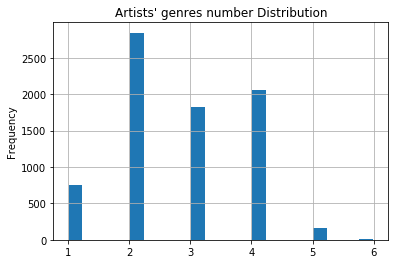

In [11]:
plot = Train_initial.genres_num.plot.hist(grid=True, bins=20, rwidth=0.9, align = 'mid',
                                            title = "Artists' genres number Distribution")
fig = plot.get_figure()
fig.savefig("Artists' genres number Distribution.jpg")

In [12]:
def label_venue(row):
    if row["count"] <= 10:
        return "small"
    elif row["count"] > 10 and row["count"] <= 20:
        return "medium"
    else:
        return "large"
    
def get_venue_dummy(df):
    venue_data= df.groupby(["venue"])["artist"].count().reset_index(name='count').sort_values(['count'], 
                                                                                                    ascending=False)
    venue_data["type"] = venue_data.apply(lambda row: label_venue(row),axis=1)
    venue_data.columns = ["venue","venue_concert_count","venue_type"]
    
    df = pd.merge(df, venue_data, on='venue')
    
    return df

def change_size_of_venue(string):
    if string == "small":
        return 1
    elif string == "medium":
        return 2
    elif string == "large":
        return 3

In [13]:
Train_initial = get_venue_dummy(Train_initial)
Train_initial.venue_type = Train_initial.venue_type.apply(lambda x: change_size_of_venue(x))

print(Train_initial.shape)

(7640, 42)


In [14]:
Train_initial.concert_date = pd.to_datetime(Train_initial.concert_date)
Train_initial.groupby(by = Train_initial.concert_date.dt.month).count()

,Unnamed: 0,address,artist,average_price,concert_date,highest_price,latitude,longitude,lowest_price,venue,...,pop,rap,reggae,rnb,rock,soul,techno,genres_num,venue_concert_count,venue_type
concert_date,,,,,,,,,,,,,,,,,,,,,
1,621,621,621,621,621,621,621,621,621,621,...,621,621,621,621,621,621,621,621,621,621
2,633,633,633,633,633,633,633,633,633,633,...,633,633,633,633,633,633,633,633,633,633
3,311,311,311,311,311,311,311,311,311,311,...,311,311,311,311,311,311,311,311,311,311
4,134,134,134,134,134,134,134,134,134,134,...,134,134,134,134,134,134,134,134,134,134
5,130,130,130,130,130,130,130,130,130,130,...,130,130,130,130,130,130,130,130,130,130
6,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
7,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
8,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
9,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [15]:
def get_time_dummy(df):
    df.concert_date = pd.to_datetime(df.concert_date)
    df['day_of_the_week'] = df['concert_date'].apply(lambda x: x.weekday())
    dummy_day = pd.get_dummies(df['day_of_the_week'] )
    dummy_day.columns = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
    df = pd.concat([df, dummy_day], 1)
    df.drop(columns = ["concert_date", "day_of_the_week"], inplace = True)
    return df

In [16]:
Train_initial = get_time_dummy(Train_initial)
print(Train_initial.shape)
Train_initial.head()

(7640, 48)


,Unnamed: 0,address,artist,average_price,highest_price,latitude,longitude,lowest_price,venue,city,...,genres_num,venue_concert_count,venue_type,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,2481,"2135 Queens Chapel Road Northeast, Washington,...",snails,120.0,584.0,45,-93,60.0,echostage,Washington,...,2,12,2,0,0,0,0,0,0,1
1,2415,"2135 Queens Chapel Road Northeast, Washington,...",slander,97.0,124.0,33,-117,73.0,echostage,Washington,...,2,12,2,0,0,0,0,0,0,1
2,2421,"2135 Queens Chapel Road Northeast, Washington,...",slander,73.0,97.0,39,-77,50.0,echostage,Washington,...,2,12,2,0,0,0,1,0,0,0
3,2424,"2135 Queens Chapel Road Northeast, Washington,...",slander,293.0,510.0,39,-121,29.0,echostage,Washington,...,2,12,2,0,0,0,0,1,0,0
4,2418,"2135 Queens Chapel Road Northeast, Washington,...",slander,124.0,584.0,46,-123,55.0,echostage,Washington,...,2,12,2,0,0,0,0,0,0,1


In [17]:
Train_initial = Train_initial.drop(columns = ["Unnamed: 0", "address","artist","venue",
                                                  "highest_price","lowest_price", "genres"])
print(Train_initial.shape)
Train_initial.head()

(7640, 41)


,average_price,latitude,longitude,city,concert_popularity,playcount,Population_Estimate_2017,market_heat,Population_density,Estimated_per_capita_income,...,genres_num,venue_concert_count,venue_type,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,120.0,45,-93,Washington,0.48,250992,693972,379,3164.666667,27106.666667,...,2,12,2,0,0,0,0,0,0,1
1,97.0,33,-117,Washington,0.51,227357,693972,379,3164.666667,27106.666667,...,2,12,2,0,0,0,0,0,0,1
2,73.0,39,-77,Washington,0.51,227357,693972,379,3164.666667,27106.666667,...,2,12,2,0,0,0,1,0,0,0
3,293.0,39,-121,Washington,0.51,227357,693972,379,3164.666667,27106.666667,...,2,12,2,0,0,0,0,1,0,0
4,124.0,46,-123,Washington,0.51,227357,693972,379,3164.666667,27106.666667,...,2,12,2,0,0,0,0,0,0,1


Here we are gathering useful information for different city class in the trainning sample by using .describe() function.

In [18]:
Train_Describe = Train_initial.drop(columns = ['latitude', 'longitude', 'city','Population_Estimate_2017',  
                                                   'Estimated_per_capita_income', 'Population_density', 
                                                   ]).astype(int)

Train_Describe.groupby(by = "Class").mean()#.hist(bins=20, )

,average_price,concert_popularity,playcount,market_heat,alternative,blues,classic-rock,classical,country,electronic,...,genres_num,venue_concert_count,venue_type,Sun,Mon,Tue,Wed,Thu,Fri,Sat
Class,,,,,,,,,,,,,,,,,,,,,
0,243.371046,0.0,1.493440e+07,190.378954,0.360097,0.029805,0.063260,0.003041,0.096107,0.074818,...,2.790754,16.111314,1.962287,0.094282,0.067518,0.099148,0.129562,0.155718,0.226886,0.226886
1,196.208481,0.0,1.082948e+07,181.317138,0.368375,0.048587,0.076855,0.002650,0.083922,0.095406,...,2.780919,16.318905,1.861307,0.108657,0.060071,0.124558,0.148410,0.156360,0.199647,0.202297
2,216.840762,0.0,1.177254e+07,157.566861,0.322779,0.040271,0.072856,0.008607,0.127882,0.101445,...,2.737473,15.844759,1.872733,0.106978,0.073163,0.113126,0.121119,0.165693,0.213342,0.206579
3,199.080000,0.0,1.369332e+07,301.240000,0.354667,0.024000,0.064000,0.000000,0.061333,0.141333,...,2.730667,13.560000,1.685333,0.109333,0.058667,0.104000,0.136000,0.149333,0.202667,0.240000
4,307.676375,0.0,1.115922e+07,393.799353,0.347896,0.037217,0.051780,0.002427,0.054207,0.103560,...,2.684466,20.650485,2.199029,0.097087,0.077670,0.127023,0.124595,0.150485,0.233010,0.190129


In [19]:
# summary_table = Train_initial.describe().T
# summary_table = summary_table.round(3)
# print(summary_table.to_latex())

In [20]:
Test_initial = get_genre_dummy(Test_initial)
Test_initial = Test_initial.drop_duplicates()
Test_initial = get_venue_dummy(Test_initial)
Test_initial.venue_type = Test_initial.venue_type.apply(lambda x: change_size_of_venue(x))

Test_initial = get_time_dummy(Test_initial)
Test_initial = Test_initial.drop(columns = ["Unnamed: 0", "address","artist","venue",
                                                  "highest_price","lowest_price", "genres"])
print(Test_initial.shape)
Test_initial.head(3)

(1908, 41)


,average_price,latitude,longitude,city,concert_popularity,playcount,Population_Estimate_2017,market_heat,Population_density,Estimated_per_capita_income,...,genres_num,venue_concert_count,venue_type,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,471.0,34,-118,Orlando,0.57,1183814,280257,164,2733.0,24822.0,...,2,8,1,0,0,0,0,0,1,0
1,3987.0,43,-76,Orlando,0.57,1183814,280257,164,2733.0,24822.0,...,2,8,1,0,0,1,0,0,0,0
2,1376.0,42,-71,Orlando,0.57,1183814,280257,164,2733.0,24822.0,...,2,8,1,0,0,0,0,1,0,0


Plot some histograms in order to see straight forward the distribution of our dataset.

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


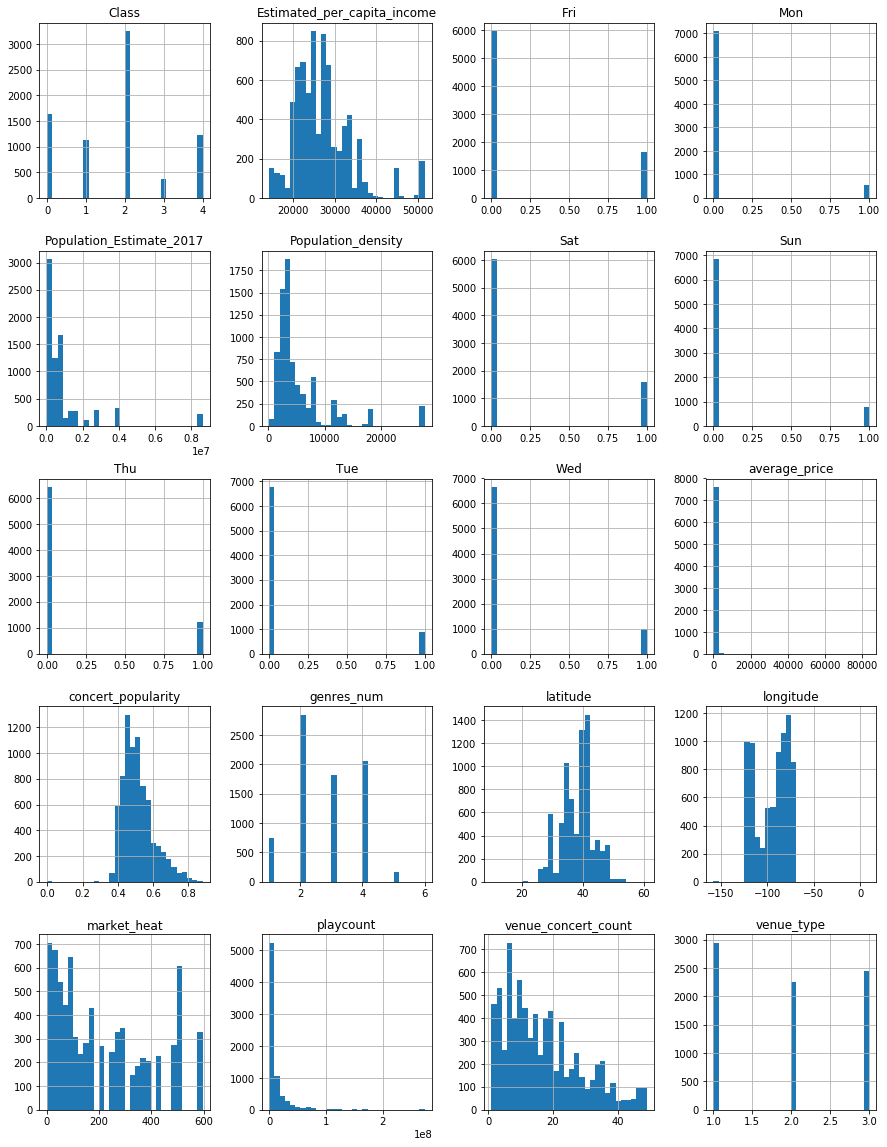

In [21]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
Train_initial.hist(ax = ax, bins = 30)
plt.savefig("Train_initial.png", dpi=200)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


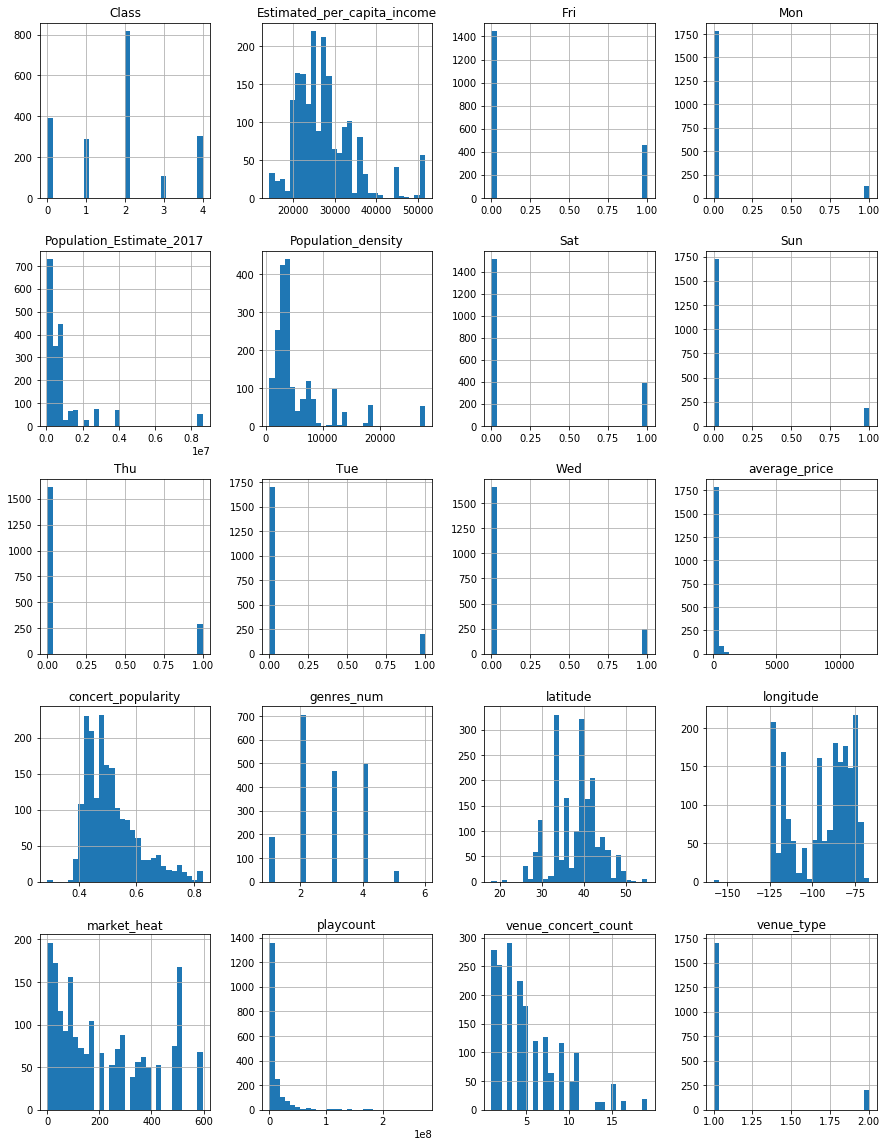

In [22]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
Test_initial.hist(ax = ax, bins = 30)
plt.savefig("Test_initial.png", dpi=200)

In [23]:
Train_initial[["average_price",'playcount', 'genres_num', 'venue_concert_count']] = np.log(Train_initial[["average_price",'playcount', 'genres_num', 'venue_concert_count']])


print(Train_initial.shape)
Train_initial.head()


(7640, 41)


,average_price,latitude,longitude,city,concert_popularity,playcount,Population_Estimate_2017,market_heat,Population_density,Estimated_per_capita_income,...,genres_num,venue_concert_count,venue_type,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,4.787492,45,-93,Washington,0.48,12.433176,693972,379,3164.666667,27106.666667,...,0.693147,2.484907,2,0,0,0,0,0,0,1
1,4.574711,33,-117,Washington,0.51,12.334277,693972,379,3164.666667,27106.666667,...,0.693147,2.484907,2,0,0,0,0,0,0,1
2,4.290459,39,-77,Washington,0.51,12.334277,693972,379,3164.666667,27106.666667,...,0.693147,2.484907,2,0,0,0,1,0,0,0
3,5.680173,39,-121,Washington,0.51,12.334277,693972,379,3164.666667,27106.666667,...,0.693147,2.484907,2,0,0,0,0,1,0,0
4,4.820282,46,-123,Washington,0.51,12.334277,693972,379,3164.666667,27106.666667,...,0.693147,2.484907,2,0,0,0,0,0,0,1


In [24]:
Test_initial[["average_price",'playcount', 'genres_num', 'venue_concert_count']] = np.log(Test_initial[["average_price", 'playcount', 'genres_num', 'venue_concert_count']])

print(Test_initial.shape)
Test_initial.head()

(1908, 41)


,average_price,latitude,longitude,city,concert_popularity,playcount,Population_Estimate_2017,market_heat,Population_density,Estimated_per_capita_income,...,genres_num,venue_concert_count,venue_type,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,6.154858,34,-118,Orlando,0.57,13.984252,280257,164,2733.0,24822.0,...,0.693147,2.079442,1,0,0,0,0,0,1,0
1,8.290794,43,-76,Orlando,0.57,13.984252,280257,164,2733.0,24822.0,...,0.693147,2.079442,1,0,0,1,0,0,0,0
2,7.226936,42,-71,Orlando,0.57,13.984252,280257,164,2733.0,24822.0,...,0.693147,2.079442,1,0,0,0,0,1,0,0
3,7.552762,39,-77,Orlando,0.57,13.984252,280257,164,2733.0,24822.0,...,0.693147,2.079442,1,0,0,0,0,0,0,1
4,4.262680,34,-118,Orlando,0.57,13.984252,280257,164,2733.0,24822.0,...,0.693147,2.079442,1,0,0,0,0,0,1,0


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


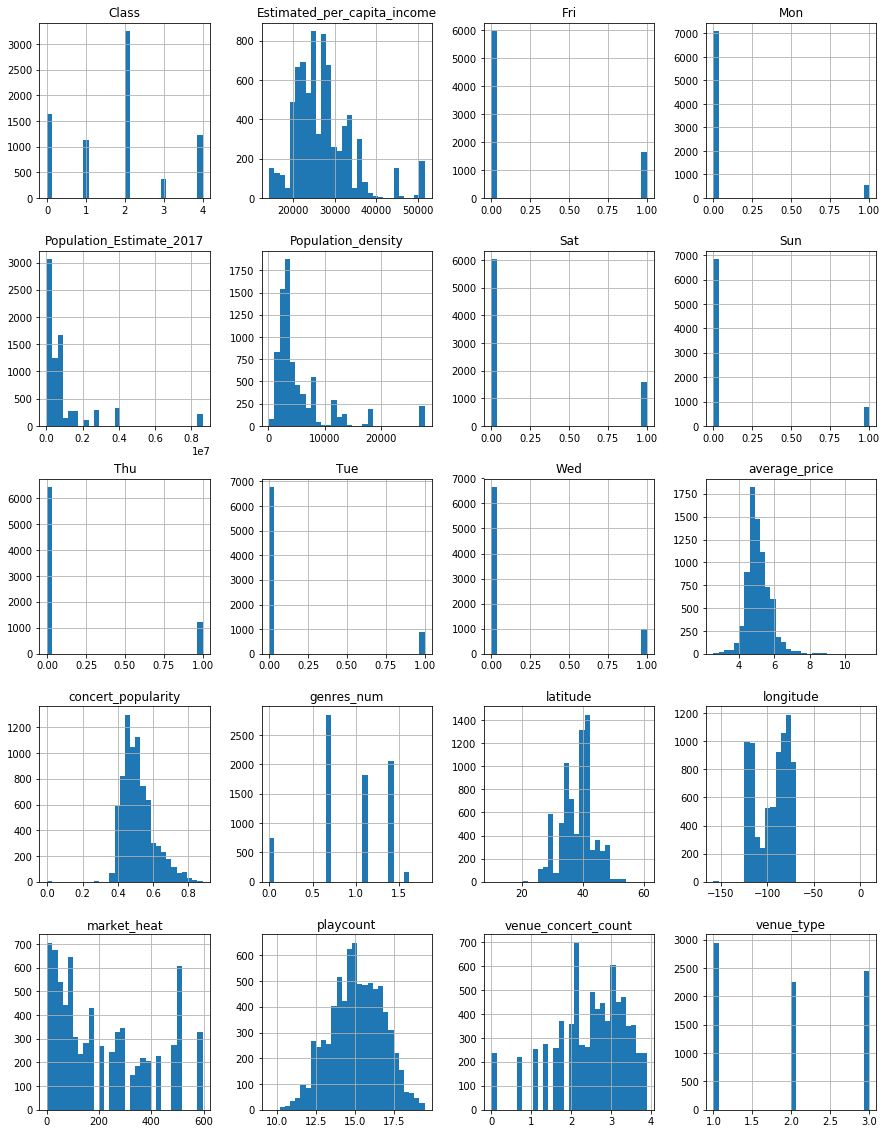

In [25]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
Train_initial.hist(ax = ax, bins = 30)
plt.savefig("Train_initial_after_log.png", dpi=200)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


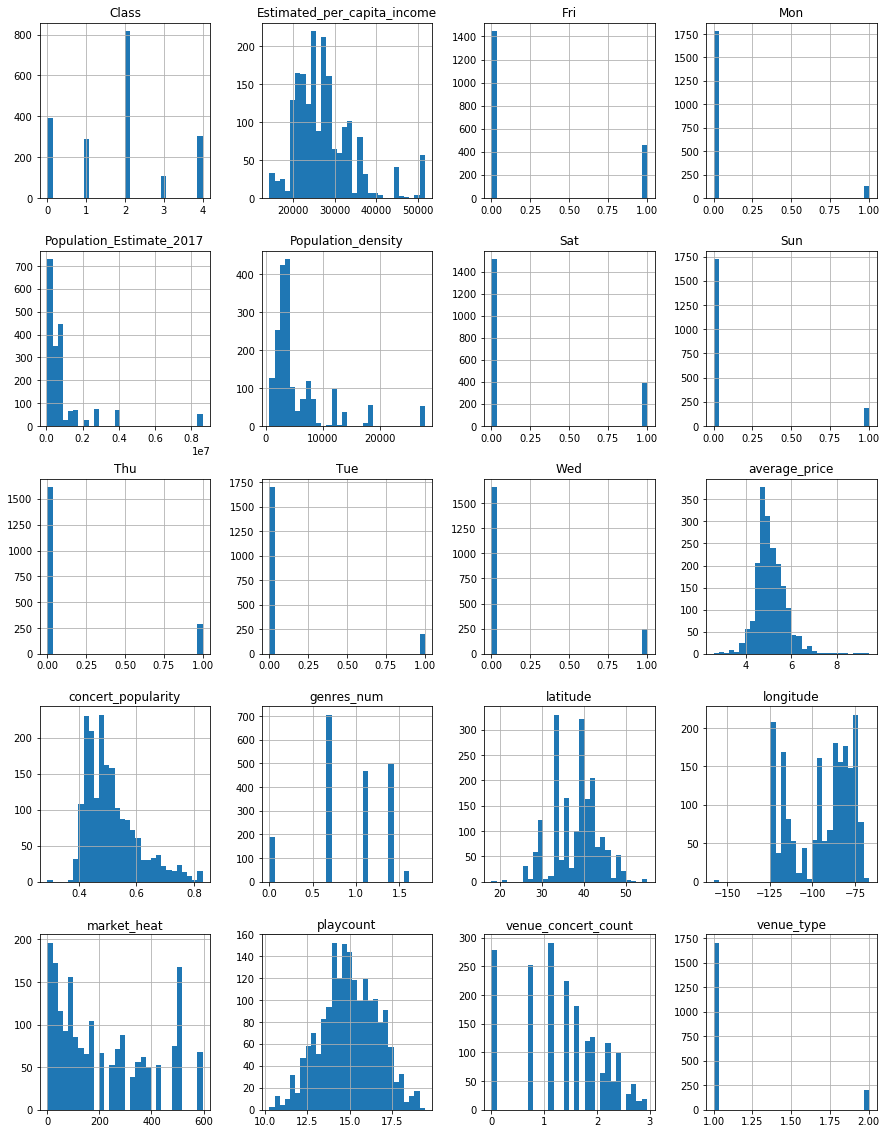

In [26]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
Test_initial.hist(ax = ax, bins = 30)
plt.savefig("Test_initial_after_log.png", dpi=200)

# 4. Predict Price

After finishing all the preliminary data processing, we started our training on the regression problem by using three different models. Explicitly speaking, we tried Stochastic Gradient Descent Linear Regression, and Support Vector Regression to explore the pricing pattern of music concerts in the US.

# 4.1 Define X train and Y train

We separate our training dataset by X_train and y_train to enable model analysis.

In [27]:
X_train_price = Train_initial.drop(columns = ["average_price", "city"])
print(X_train_price.shape)
X_train_price.head(3)

(7640, 39)


,latitude,longitude,concert_popularity,playcount,Population_Estimate_2017,market_heat,Population_density,Estimated_per_capita_income,Class,alternative,...,genres_num,venue_concert_count,venue_type,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,45,-93,0.48,12.433176,693972,379,3164.666667,27106.666667,2,0,...,0.693147,2.484907,2,0,0,0,0,0,0,1
1,33,-117,0.51,12.334277,693972,379,3164.666667,27106.666667,2,0,...,0.693147,2.484907,2,0,0,0,0,0,0,1
2,39,-77,0.51,12.334277,693972,379,3164.666667,27106.666667,2,0,...,0.693147,2.484907,2,0,0,0,1,0,0,0


In [28]:
#y_train_price.describe(percentiles = [0.1,0.9]).T


In [29]:
y_train_price = Train_initial["average_price"]
y_train_price = pd.DataFrame(y_train_price)
y_train_price.head()

,average_price
0,4.787492
1,4.574711
2,4.290459
3,5.680173
4,4.820282


In [30]:
y_train_price.describe()

,average_price
count,7640.000000
mean,5.094181
std,0.657970
min,2.564949
25%,4.682131
50%,4.997212
75%,5.442418
max,11.332722


# 4.2 Define X test and Y test

We separate our test dataset by X_test and y_test to enable testing.

In [31]:
y_test_price = Test_initial["average_price"]
y_test_price  = pd.DataFrame(y_test_price)
y_test_price.shape

(1908, 1)

In [32]:
X_test_price = Test_initial.drop(columns = ["average_price","city"])
X_test_price.head()

,latitude,longitude,concert_popularity,playcount,Population_Estimate_2017,market_heat,Population_density,Estimated_per_capita_income,Class,alternative,...,genres_num,venue_concert_count,venue_type,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,34,-118,0.57,13.984252,280257,164,2733.0,24822.0,2,0,...,0.693147,2.079442,1,0,0,0,0,0,1,0
1,43,-76,0.57,13.984252,280257,164,2733.0,24822.0,2,0,...,0.693147,2.079442,1,0,0,1,0,0,0,0
2,42,-71,0.57,13.984252,280257,164,2733.0,24822.0,2,0,...,0.693147,2.079442,1,0,0,0,0,1,0,0
3,39,-77,0.57,13.984252,280257,164,2733.0,24822.0,2,0,...,0.693147,2.079442,1,0,0,0,0,0,0,1
4,34,-118,0.57,13.984252,280257,164,2733.0,24822.0,2,0,...,0.693147,2.079442,1,0,0,0,0,0,1,0


In [33]:
#list(X_test_price)

# 4.3 Normalize Data

We use minmax-scale method to reduce the range of the data, which can reduce error.

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
def min_max_scale(X_train, X_test):
    column_name = list(X_train.head(0))
    scaler = MinMaxScaler().fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns = column_name)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = column_name)

    return X_train, X_test

def normalize(X_train, X_test):
    column_name = list(X_train.head(0))
    scaler = Normalizer().fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns = column_name)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = column_name)
    return X_train, X_test


In [35]:
X_train_price, X_test_price = min_max_scale(X_train_price, X_test_price)

print(X_train_price.shape, X_test_price.shape)

(7640, 39) (1908, 39)


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [36]:
# scaler_y_price = MinMaxScaler().fit(y_train_price)
# y_train_price = pd.DataFrame(scaler_y_price.transform(y_train_price))
# y_test_price = pd.DataFrame(scaler_y_price.transform(y_test_price))

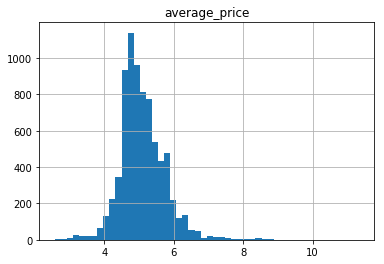

In [37]:
y_train_price.hist(bins = 50)
plt.savefig("Avg-price distribution.png", dpi=200)

# 4.4 Define Loss Function

$$ arg\  min\ \ l(w) = \sqrt{\frac{1}{M}\sum_{i=1}^M (\frac{(y^{(i)}-f(x)^{(i)})}{y^{(i)}})^2} + \lambda(w)$$


In [38]:
import math

def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w


def score_func(y, y_pred):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - y_pred)**2 ))
    
    return rmspe

In [39]:
baseline = score_func(y_train_price.values.ravel(), np.mean(y_train_price.values.ravel()))
print("Baseline is:", baseline)

Baseline is: 0.13110655402149027


# 4.5 SGD Linear Regresion

1. We use pipeline to let machine automatically go through all the procedures.
2. We try to apply PCA but the result generated is quite bad: it automatically choose not to reduce the dimension.
3. We also use cross validation in grid search to find best parameters and reduce variance.
4. The result shows that the best model's RMSPE error is 0.13316541045840025

In [40]:
pipeline = Pipeline([
    ("pca", PCA()),
    ("poly", PolynomialFeatures()),
    ("sgd", SGDRegressor(penalty="l2"))])

polies = [0,1,2]
sgd__alphas = [10**-2, 10**-1, 10]

iters = [100, 300, 500]
parameters = {'pca__n_components': [2, 5, 10],
              'poly__degree': polies,
              'sgd__penalty': ["l1","l2"],
              'sgd__max_iter': iters,
              'sgd__alpha': sgd__alphas,
              
              }

grid_search = RandomizedSearchCV(pipeline, parameters, 
                           cv=5, 
                           scoring = make_scorer(score_func))
                           #scoring = "neg_mean_squared_error" )
grid_search.fit(X_train_price.values,y_train_price.values.ravel())  
print(grid_search.best_params_)
print(grid_search.best_score_)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If

{'pca__n_components': 5, 'sgd__alpha': 0.1, 'sgd__max_iter': 300, 'sgd__penalty': 'l1', 'poly__degree': 0}
0.13149943234083952


In [41]:
y_hat_price_train = grid_search.predict(X_train_price)
print(y_hat_price_train)

[5.09608746 5.09608746 5.09608746 ... 5.09608746 5.09608746 5.09608746]


In [42]:
 grid_search.best_estimator_

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('poly', PolynomialFeatures(degree=0, include_bias=True, interaction_only=False)), ('sgd', SGDRegressor(alpha=0.1, average=False, early_stopping=False, epsilon=0.1,
 ...m_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False))])

In [43]:
grid_search.score(X_test_price.values, y_test_price.values.ravel())

0.1324347072344291

# 4.5 SVM Regression

1. We use randomized search here for SVM which can efficiently reduce the runtime.
2. The best model of SVM still has error 0.15916004600330003, which is even worse than random predict by mean of the price. 

 $$minimize\quad \frac{1}{2}\left\Vert{w}\right\Vert^2 + \frac{1}{C}\sum_{1 = 1}^M(\xi_i + \xi_i^\prime)$$
 $$s.t.\quad y^{(i)} - (\langle w \,,\phi(x^{(i)})\rangle + w_0) \leq \varepsilon + \xi_i$$
 $$s.t.\quad y^{(i)} + (\langle w \,,\phi(x^{(i)})\rangle + w_0) \leq \varepsilon + \xi_i^\prime$$
 $$\xi_i, \xi_i^\prime \geq 0$$

In [44]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import math
svr = SVR()

pipe_svr = Pipeline(steps=[('svr', svr)])


 $$\vec{w}\cdot \phi(\vec{x}) = \sum_{i}\alpha_{i}y_{i}\exp(-\gamma\left\Vert{\vec{x}_{i} - \vec{x}_{j}}\right\Vert^2)$$

In [45]:
param_grid_svr = {
    'svr__C': [0.1, 0.01, 0.5],
    'svr__gamma': [0.1, 0.01, 0.001],
    'svr__epsilon': [0.1, 0.01, 2],
    'svr__kernel': ['rbf']
}
search_svr = RandomizedSearchCV(pipe_svr, param_grid_svr, iid=False, cv=10,
                      return_train_score=False, scoring = make_scorer(score_func))
search_svr.fit(X_train_price.values, y_train_price.values.ravel())
print("Best parameter (CV score=%0.3f):" % search_svr.best_score_)
print(search_svr.best_params_)

Best parameter (CV score=0.157):
{'svr__gamma': 0.1, 'svr__C': 0.1, 'svr__epsilon': 2, 'svr__kernel': 'rbf'}


In [46]:
search_svr.score(X_test_price.values, y_test_price.values.ravel())

0.15253069258108481

In [47]:
search_svr.predict(X_train_price.values)

array([5.21760762, 5.21582503, 5.16099385, ..., 5.57623901, 5.56916864,
       5.47669896])

# 5. Classify location

After solved the regression problem, we tried to identify locations for different concerts. Totally we clustered five classes for cities by k-means, based on their income per capita and population density. Nevertheless, since the weight of different class are not the same, oversampling is used to balance the training dataset. Probing into this problem, we tested four models, which are SGD Logistic regression, Support Vector Classifier, Neural Networks and Random Forest.

# 5.1 Define X train and Y train

We clean our dataset by dropping useless variables and split it into X_train and y_train.

In [49]:
X_train_location = Train_initial.drop(columns = ['latitude', 'longitude', 'city','Population_Estimate_2017', 
                                                 'Estimated_per_capita_income', 'Population_density', 
                                                   'Class'])
print(X_train_location.shape)
X_train_location.head()

(7640, 34)


,average_price,concert_popularity,playcount,market_heat,alternative,blues,classic-rock,classical,country,electronic,...,genres_num,venue_concert_count,venue_type,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,4.787492,0.48,12.433176,379,0,0,0,0,0,1,...,0.693147,2.484907,2,0,0,0,0,0,0,1
1,4.574711,0.51,12.334277,379,0,0,0,0,0,1,...,0.693147,2.484907,2,0,0,0,0,0,0,1
2,4.290459,0.51,12.334277,379,0,0,0,0,0,1,...,0.693147,2.484907,2,0,0,0,1,0,0,0
3,5.680173,0.51,12.334277,379,0,0,0,0,0,1,...,0.693147,2.484907,2,0,0,0,0,1,0,0
4,4.820282,0.51,12.334277,379,0,0,0,0,0,1,...,0.693147,2.484907,2,0,0,0,0,0,0,1


In [50]:
Y_train_location = Train_initial[["Class"]]
print(Y_train_location.shape)
Y_train_location.head()

(7640, 1)


,Class
0,2
1,2
2,2
3,2
4,2


In [51]:
Y_train_location.groupby(by = "Class").count()

""
Class
0
1
2
3
4


# 5.2 Define X test and Y test

We clean our dataset by dropping useless variables and split it into X_test and y_test.

In [52]:
X_test_location = Test_initial.drop(columns = ['latitude', 'longitude', 'city','Population_Estimate_2017', 
                                                 'Estimated_per_capita_income', 'Population_density', 
                                                   'Class'])
print(X_test_location.shape)
X_test_location.head()

(1908, 34)


,average_price,concert_popularity,playcount,market_heat,alternative,blues,classic-rock,classical,country,electronic,...,genres_num,venue_concert_count,venue_type,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,6.154858,0.57,13.984252,164,0,0,0,0,0,1,...,0.693147,2.079442,1,0,0,0,0,0,1,0
1,8.290794,0.57,13.984252,164,0,0,0,0,0,1,...,0.693147,2.079442,1,0,0,1,0,0,0,0
2,7.226936,0.57,13.984252,164,0,0,0,0,0,1,...,0.693147,2.079442,1,0,0,0,0,1,0,0
3,7.552762,0.57,13.984252,164,0,0,0,0,0,1,...,0.693147,2.079442,1,0,0,0,0,0,0,1
4,4.262680,0.57,13.984252,164,0,0,0,0,0,1,...,0.693147,2.079442,1,0,0,0,0,0,1,0


In [53]:
Y_test_location = Test_initial[["Class"]]
print(Y_test_location.shape)
Y_test_location.head()

(1908, 1)


,Class
0,2
1,2
2,2
3,2
4,2


# 5.3 Handling Missing Data

Here we use imputer to handling missing data.

In [54]:
imputer = Imputer(strategy="most_frequent")
imputer.fit(X_train_location)
columns_X = list(X_train_location)
X_train_location = imputer.transform(X_train_location)

columns_Y = list(Y_train_location)
imputer.fit(Y_train_location)
Y_train_location = imputer.transform(Y_train_location)

X_train_location = pd.DataFrame(X_train_location,columns = columns_X)
Y_train_location = pd.DataFrame(Y_train_location,columns = columns_Y)


print(X_train_location.shape, Y_train_location.shape)
X_train_location.head()

(7640, 34) (7640, 1)


/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,average_price,concert_popularity,playcount,market_heat,alternative,blues,classic-rock,classical,country,electronic,...,genres_num,venue_concert_count,venue_type,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,4.787492,0.48,12.433176,379.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.693147,2.484907,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.574711,0.51,12.334277,379.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.693147,2.484907,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4.290459,0.51,12.334277,379.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.693147,2.484907,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5.680173,0.51,12.334277,379.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.693147,2.484907,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.820282,0.51,12.334277,379.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.693147,2.484907,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
imputer = Imputer(strategy="most_frequent")
imputer.fit(X_test_location)
columns_X = list(X_test_location)
X_test_location = imputer.transform(X_test_location)

columns_Y = list(Y_test_location)
imputer.fit(Y_test_location)
Y_test_location = imputer.transform(Y_test_location)

X_test_location = pd.DataFrame(X_test_location,columns = columns_X)
Y_test_location = pd.DataFrame(Y_test_location,columns = columns_Y)


print(X_test_location.shape, Y_test_location.shape)
X_test_location.head()

(1908, 34) (1908, 1)


/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,average_price,concert_popularity,playcount,market_heat,alternative,blues,classic-rock,classical,country,electronic,...,genres_num,venue_concert_count,venue_type,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,6.154858,0.57,13.984252,164.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.693147,2.079442,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,8.290794,0.57,13.984252,164.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.693147,2.079442,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,7.226936,0.57,13.984252,164.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.693147,2.079442,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,7.552762,0.57,13.984252,164.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.693147,2.079442,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4.262680,0.57,13.984252,164.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.693147,2.079442,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 5.4 Normalize Data

Use minmax-scaler to manipulate data in order to diminish error.

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler().fit(X_train_location)
X_train_location = scaler_X.transform(X_train_location)
Y_train_location = Y_train_location.values.ravel()
print(X_train_location.shape, Y_train_location.shape)
X_train_location[:2]

(7640, 34) (7640,)


array([[0.25348998, 0.54545455, 0.29287238, 0.63529412, 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.38685281,
        0.6384947 , 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.22922147, 0.57954545, 0.28287434, 0.63529412, 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.38685281,
        0.6384947 , 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        ]])

In [57]:
X_test_location = scaler_X.transform(X_test_location)
Y_test_location = Y_test_location.values.ravel()
print(X_test_location.shape, Y_test_location.shape)
X_test_location[:2]

(1908, 34) (1908,)


array([[0.40944365, 0.64772727, 0.44967501, 0.27394958, 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.38685281,
        0.53431078, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.65305585, 0.64772727, 0.44967501, 0.27394958, 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.38685281,
        0.53431078, 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        ]])

# 5.5 Handle Unbalanced Problem

In [58]:
#!sudo pip install imblearn

In [59]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_location_resampled, Y_train_location_resampled = ros.fit_resample(X_train_location,
                                                                          Y_train_location)
print(X_train_location_resampled.shape, Y_train_location_resampled.shape)

(16265, 34) (16265,)


# 5.6 SGD Logistic Regression

From here, we tried logistic regression.
$$f(x) = \frac{1}{1+e^{-(w_0 + w^T X)}} + \frac{1}{C}\left\Vert{w}\right\Vert$$

1. Always use pipeline and cross validation.
2. We are tuning more parameters, and we also add restriction term here.
3. The accuracy is around 47% which is definitely better than random guessing.

In [60]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(tol=1e-5, solver = "saga", 
                            multi_class='ovr')
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logreg', logreg)])

In [61]:
param_grid = {
    'pca__n_components': [3, 10, 33],
    'logreg__penalty': ['l2', 'l1'],
    'logreg__multi_class': ['ovr', 'multinomial'],
    'logreg__max_iter': [200, 800],
    'logreg__C': [0.01, 0.1, 0.001],
}
search = RandomizedSearchCV(pipe, param_grid, iid=False, cv=5,
                      return_train_score=False)
search.fit(X_train_location, Y_train_location)
print("Training Accuracy is %0.3f" % search.best_score_)
print(search.best_params_)

Training Accuracy is 0.458
{'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__multi_class': 'multinomial', 'logreg__max_iter': 200, 'pca__n_components': 33}


In [62]:
print("Testing accuracy is %0.3f" % search.score(X_test_location, Y_test_location))

Testing accuracy is 0.472


In [63]:
logreg2 = LogisticRegression(tol=1e-5, solver = "saga", 
                            multi_class='ovr')
logreg2.fit(X_train_location, Y_train_location)
print("Benchmark accuracy is %0.3f" % logreg2.score(X_train_location, Y_train_location))

Benchmark accuracy is 0.483


# 5.7 SVM Classification

 we implemented a SVM Classifier with RBF kernel function. The predicted function turn out to be this:
 $$ f(x) = \sum_{i = 1}^{M}y^{(i)}\alpha^{(i)}*\langle\phi(x^{(i)})\,,\phi(x^{(i)})\rangle_\mathcal{H} + w_0 $$

From here we can just optimize this function without intensive calculation:
$$maximize \quad\sum_{i = 1}^{M}\alpha_i - \frac{1}{2}\sum_{i,j = 1}^{M}y^{(i)}y^{(j)}\alpha^{(i)}\alpha^{(j)}\kappa(x^{(i)},x^{(j)})$$
 $$subject\: to \quad \sum_{i = 1}^{N} y_i\alpha_i = 0$$
 $$where \quad 0 \leq \alpha_i \leq \frac{1}{\lambda}$$

In [64]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

svm = SVC(C = 1.1,kernel = "rbf", tol = 1e-3)

pipe_svm = Pipeline(steps=[('svm', svm)])



In [65]:
param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.1, 0.01, 0.001],
    'svm__decision_function_shape' : ["ovr", "ovo"],
    #'svm__max_iter': [2000,1000]
}
search_svm = RandomizedSearchCV(pipe_svm, param_grid_svm, iid=False, cv=5,
                      return_train_score=False)
search_svm.fit(X_train_location, Y_train_location)
print("Training Accuracy is %0.3f):" % search_svm.best_score_)
print(search_svm.best_params_)

Training Accuracy is 0.465):
{'svm__decision_function_shape': 'ovo', 'svm__gamma': 0.001, 'svm__C': 10}


In [66]:
print("Testing accuracy is %0.3f" % search_svm.score(X_test_location, Y_test_location))

Testing accuracy is 0.480


In [67]:
svm2 = SVC(kernel = "rbf")
svm2.fit(X_train_location, Y_train_location)
print("Trainning benchmark is %0.3f" % svm2.score(X_train_location, Y_train_location))

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Trainning benchmark is 0.487


# 5.8 Neural Network Classification

From here we are trying to improve our result by involving deep learning model. We use keras to implete our neural network model. After choosing sequential model, we add 4 layers, adjust some regularization terms and set the last activation function as softmax. you can see from the summary and plot and our model performs well.

In [68]:
from keras import models
from keras import layers
from keras import regularizers
from keras.layers import Dropout

Using TensorFlow backend.


In [69]:
knn = models.Sequential()
# kernel_regularizer = regularizers.l2(0.001)
knn.add(layers.Dense(64,  activation = 'relu', input_shape = (34, )))
knn.add(Dropout(0.2))
knn.add(layers.Dense(16,  activation = 'relu'))
knn.add(Dropout(0.2))
knn.add(layers.Dense(16, activation = 'relu'))

#knn.add(layers.Dense(5, activation = 'relu'))
knn.add(layers.Dense(5, activation = 'softmax'))
knn.compile(loss='sparse_categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

In [70]:
knn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2240      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 85        
Total params: 3,637
Trainable params: 3,637
Non-trainable params: 0
_________________________________________________________________


In [71]:
history = knn.fit(X_train_location, Y_train_location, epochs = 200, 
                 verbose = 1, validation_data = (X_test_location, Y_test_location) )

Train on 7640 samples, validate on 1908 samples
Epoch 1/200
7640/7640 [==============================] - 0s 59us/step - loss: 1.4459 - acc: 0.4154 - val_loss: 1.4009 - val_acc: 0.4287
Epoch 2/200
7640/7640 [==============================] - 0s 46us/step - loss: 1.3803 - acc: 0.4394 - val_loss: 1.3619 - val_acc: 0.4701
Epoch 3/200
7640/7640 [==============================] - 0s 47us/step - loss: 1.3426 - acc: 0.4626 - val_loss: 1.3369 - val_acc: 0.4748
Epoch 4/200
7640/7640 [==============================] - 0s 47us/step - loss: 1.3291 - acc: 0.4671 - val_loss: 1.3253 - val_acc: 0.4754
Epoch 5/200
7640/7640 [==============================] - 0s 46us/step - loss: 1.3164 - acc: 0.4763 - val_loss: 1.3172 - val_acc: 0.4785
Epoch 6/200
7640/7640 [==============================] - 0s 47us/step - loss: 1.3044 - acc: 0.4796 - val_loss: 1.3068 - val_acc: 0.4790
Epoch 7/200
7640/7640 [==============================] - 0s 46us/step - loss: 1.2964 - acc: 0.4800 - val_loss: 1.3026 - val_acc: 0.4817


7640/7640 [==============================] - 0s 47us/step - loss: 1.1724 - acc: 0.5041 - val_loss: 1.2003 - val_acc: 0.4984
Epoch 61/200
7640/7640 [==============================] - 0s 46us/step - loss: 1.1738 - acc: 0.5043 - val_loss: 1.1990 - val_acc: 0.4984
Epoch 62/200
7640/7640 [==============================] - 0s 46us/step - loss: 1.1788 - acc: 0.5003 - val_loss: 1.1967 - val_acc: 0.4969
Epoch 63/200
7640/7640 [==============================] - 0s 46us/step - loss: 1.1729 - acc: 0.5035 - val_loss: 1.1962 - val_acc: 0.5010
Epoch 64/200
7640/7640 [==============================] - ETA: 0s - loss: 1.1676 - acc: 0.502 - 0s 46us/step - loss: 1.1670 - acc: 0.5037 - val_loss: 1.1950 - val_acc: 0.5021
Epoch 65/200
7640/7640 [==============================] - 0s 47us/step - loss: 1.1717 - acc: 0.5047 - val_loss: 1.1943 - val_acc: 0.5052
Epoch 66/200
7640/7640 [==============================] - 1s 76us/step - loss: 1.1679 - acc: 0.5064 - val_loss: 1.1930 - val_acc: 0.5068
Epoch 67/200
764

7640/7640 [==============================] - 0s 46us/step - loss: 1.1246 - acc: 0.5211 - val_loss: 1.1614 - val_acc: 0.5320
Epoch 120/200
7640/7640 [==============================] - 0s 46us/step - loss: 1.1227 - acc: 0.5198 - val_loss: 1.1590 - val_acc: 0.5335
Epoch 121/200
7640/7640 [==============================] - 0s 46us/step - loss: 1.1170 - acc: 0.5242 - val_loss: 1.1601 - val_acc: 0.5330
Epoch 122/200
7640/7640 [==============================] - 0s 46us/step - loss: 1.1200 - acc: 0.5194 - val_loss: 1.1608 - val_acc: 0.5314
Epoch 123/200
7640/7640 [==============================] - 0s 46us/step - loss: 1.1238 - acc: 0.5141 - val_loss: 1.1603 - val_acc: 0.5309
Epoch 124/200
7640/7640 [==============================] - 0s 46us/step - loss: 1.1200 - acc: 0.5213 - val_loss: 1.1609 - val_acc: 0.5314
Epoch 125/200
7640/7640 [==============================] - 0s 46us/step - loss: 1.1279 - acc: 0.5205 - val_loss: 1.1600 - val_acc: 0.5325
Epoch 126/200
7640/7640 [=======================

7640/7640 [==============================] - 0s 46us/step - loss: 1.0974 - acc: 0.5336 - val_loss: 1.1441 - val_acc: 0.5414
Epoch 179/200
7640/7640 [==============================] - 0s 46us/step - loss: 1.0930 - acc: 0.5325 - val_loss: 1.1430 - val_acc: 0.5409
Epoch 180/200
7640/7640 [==============================] - 0s 47us/step - loss: 1.0979 - acc: 0.5338 - val_loss: 1.1429 - val_acc: 0.5393
Epoch 181/200
7640/7640 [==============================] - 0s 47us/step - loss: 1.1033 - acc: 0.5300 - val_loss: 1.1429 - val_acc: 0.5414
Epoch 182/200
7640/7640 [==============================] - 0s 46us/step - loss: 1.0970 - acc: 0.5351 - val_loss: 1.1430 - val_acc: 0.5414
Epoch 183/200
7640/7640 [==============================] - 0s 47us/step - loss: 1.0916 - acc: 0.5339 - val_loss: 1.1429 - val_acc: 0.5409
Epoch 184/200
7640/7640 [==============================] - 0s 46us/step - loss: 1.0981 - acc: 0.5292 - val_loss: 1.1437 - val_acc: 0.5414
Epoch 185/200
7640/7640 [=======================

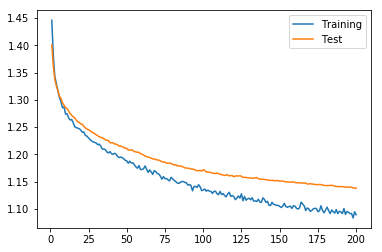

In [72]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, label = "Training")
plt.plot(epochs, val_loss, label = "Test")
plt.legend()
plt.savefig("loss_overfit.png")

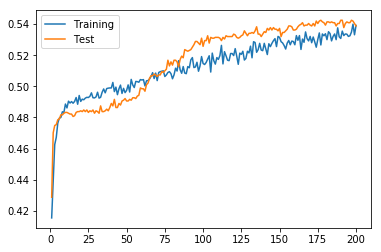

In [73]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, label = "Training")
plt.plot(epochs, val_acc, label = "Test")
plt.legend()
plt.savefig("accuracy_overfit.png")

In [74]:
scores = knn.evaluate(X_train_location, Y_train_location)
print("\n%s: %.2f%%" % (knn.metrics_names[1], scores[1]*100))

7640/7640 [==============================] - 0s 20us/step

acc: 56.61%


In [75]:
loss, acc = knn.evaluate(X_test_location, Y_test_location)
print(loss)
print(acc)

1908/1908 [==============================] - 0s 21us/step
1.1382308401151773
0.5387840670859538


In [76]:
loss, acc = knn.evaluate(X_train_location, Y_train_location)
print(loss)
print(acc)

7640/7640 [==============================] - 0s 21us/step
1.0253947488300463
0.5660994764085839


# 5.9 Random Forest 

We use random forest as the last trial on our classification problem. Here by using randomized search, we can easily get good result, and even by seting large epoch, we can perfectly overfit and get 100% accuracy.

In [77]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

pipe_randomforest = Pipeline([('classifier', RandomForestClassifier(random_state = 5))])

 

In [78]:
bench_randomforest = RandomForestClassifier(random_state = 5, n_estimators = 500, 
                                           criterion = "entropy", max_depth = 200, min_samples_leaf = 1)
bench_randomforest.fit(X_train_location, Y_train_location)
print("Upper Bound Score is ", bench_randomforest.score(X_train_location, Y_train_location))

Upper Bound Score is  1.0


In [79]:
param_random_randomforest = {
    'classifier__n_estimators': sp_randint(1,150,5),
    'classifier__criterion' : ["entropy"],
    'classifier__max_depth' : sp_randint(1,50,5),
    
    'classifier__min_samples_leaf': sp_randint(1,30,5)
}
search_randomforest = RandomizedSearchCV(pipe_randomforest, param_random_randomforest, iid=False, cv=5,
                      return_train_score=True)
search_randomforest.fit(X_train_location, Y_train_location)
print("Random Forest Training Accuracy is %0.3f" % search_randomforest.best_score_)
print(search_randomforest.best_params_)

Random Forest Training Accuracy is 0.513
{'classifier__n_estimators': 114, 'classifier__criterion': 'entropy', 'classifier__min_samples_leaf': 7, 'classifier__max_depth': 51}


In [80]:
print("Random Forest Testing Accuracy is %0.3f" %search_randomforest.score(X_test_location, Y_test_location))

Random Forest Testing Accuracy is 0.653


In [81]:
Y_test_pred = search_randomforest.predict(X_test_location)
print(Y_test_pred)

[2. 2. 2. ... 2. 2. 2.]


# 5. 10 Plot Confusion Matrix

Visualize our result by confusion matrix.

In [82]:
from sklearn.metrics import confusion_matrix
import itertools

In [83]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [84]:
cnf_matrix = confusion_matrix(Y_test_location, Y_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()

Confusion matrix, without normalization
[[114   0 253   0  23]
 [  3  56 229   0   0]
 [  4   4 797   0  13]
 [  3   0  12  93   0]
 [  5   2 112   0 185]]


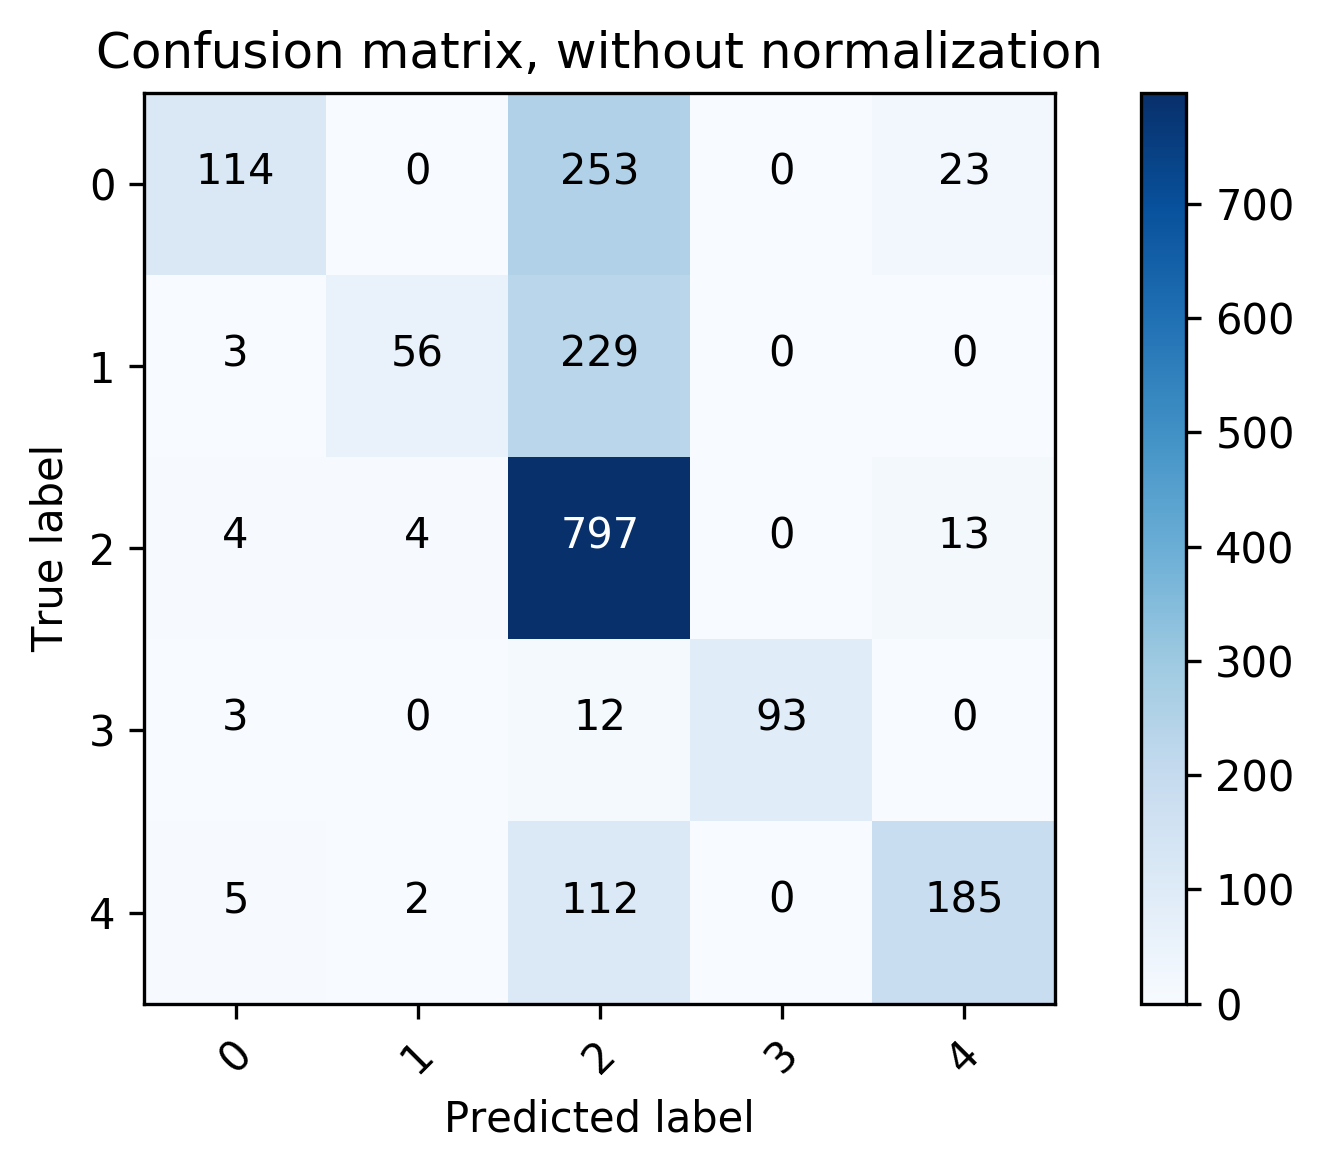

In [85]:
# Plot non-normalized confusion matrix
plt.figure(dpi =300)
class_names = [0,1,2,3,4]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.savefig("Confusion matrix, without normalization.png")

Normalized confusion matrix
[[0.29 0.   0.65 0.   0.06]
 [0.01 0.19 0.8  0.   0.  ]
 [0.   0.   0.97 0.   0.02]
 [0.03 0.   0.11 0.86 0.  ]
 [0.02 0.01 0.37 0.   0.61]]


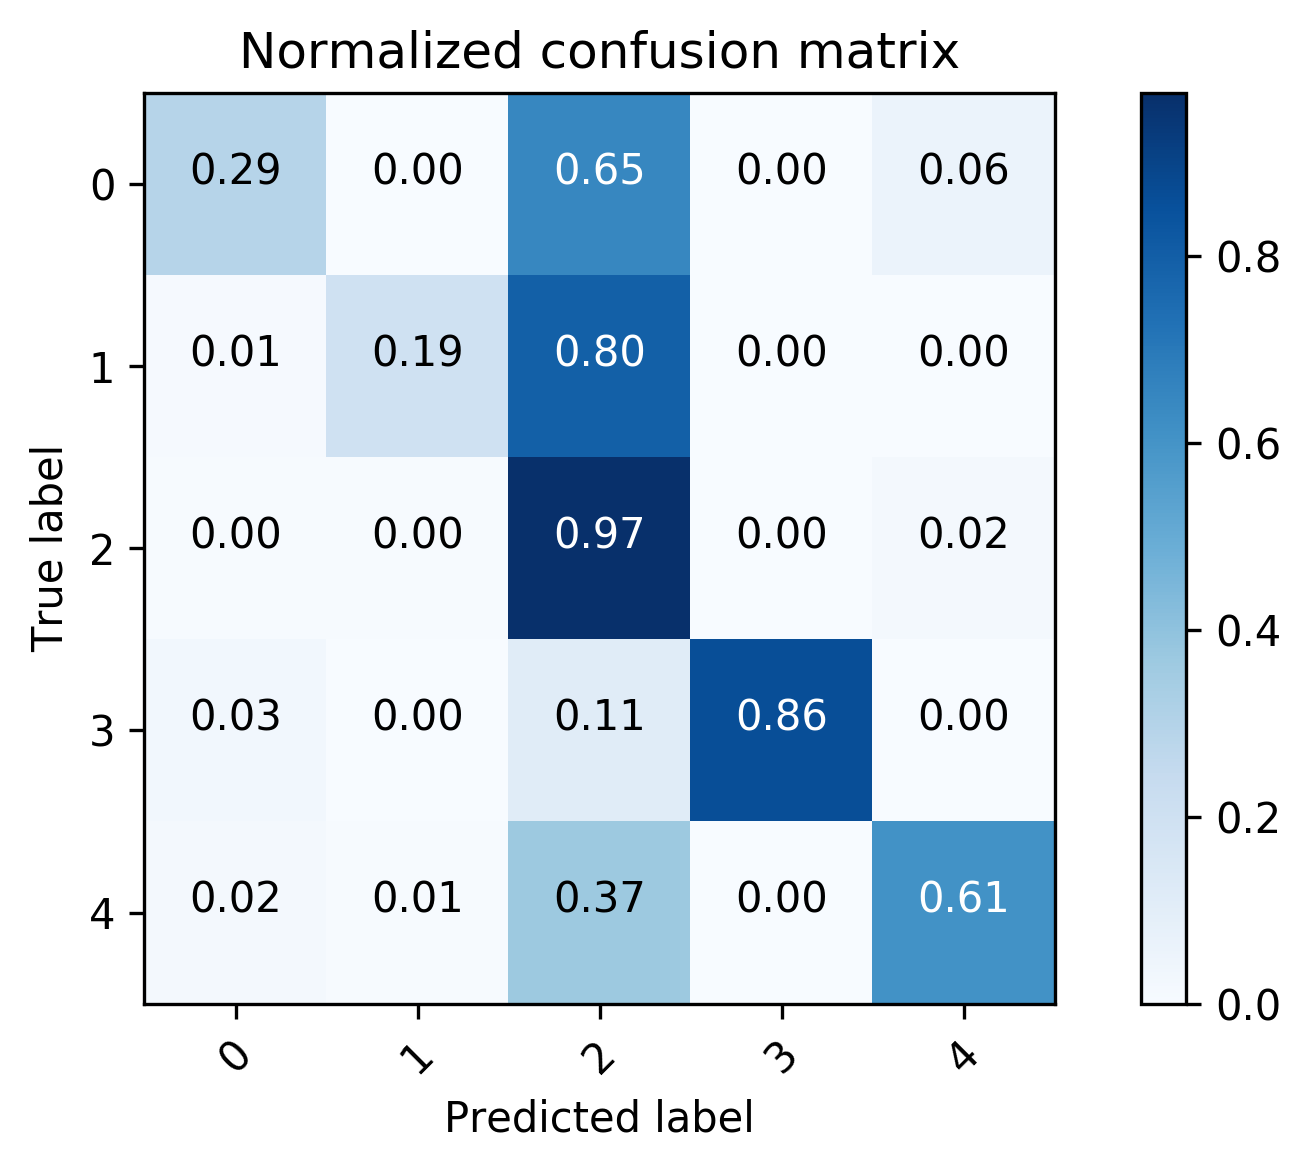

In [86]:
plt.figure(dpi = 300)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig("Normalized confusion matrix.png")
